# Time Series with RNN

## Fill the cells marked with # TODO

** Import numpy pandas and matplotlib **

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

** Use pandas to read the csv of the data.csv file and set index_col='Month' **

In [0]:
# TODO
crop = pd.read_csv("data.csv", index_col = 'Month')

** Check out the head of the dataframe**

In [3]:
crop.head()
print(crop.iloc[0])

Crop    589.0
Name: 1962-01-01 01:00:00, dtype: float64


** Make the index a time series by using: **

In [0]:
crop.index = pd.to_datetime(crop.index)

** Plot out the time series data. **

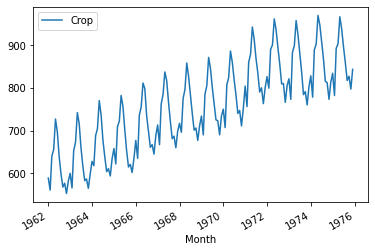

In [5]:
crop.plot()

___

### Train Test Split

** Let's attempt to predict a year's worth of data. (12 months or 12 steps into the future) **

** Create a test train split using indexing (hint: use .head() or tail() or .iloc[]). We don't want a random train test split, we want to specify that the test set is the last 12 months of data is the test set, with everything before it is the training. **

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crop    168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [7]:
print(crop.iloc[:155])
train_set = crop.iloc[:155]

                      Crop
Month                     
1962-01-01 01:00:00  589.0
1962-02-01 01:00:00  561.0
1962-03-01 01:00:00  640.0
1962-04-01 01:00:00  656.0
1962-05-01 01:00:00  727.0
...                    ...
1974-07-01 01:00:00  908.0
1974-08-01 01:00:00  867.0
1974-09-01 01:00:00  815.0
1974-10-01 01:00:00  812.0
1974-11-01 01:00:00  773.0

[155 rows x 1 columns]


In [8]:
print(crop.tail(12))
test_set = crop.tail(12)

                      Crop
Month                     
1975-01-01 01:00:00  834.0
1975-02-01 01:00:00  782.0
1975-03-01 01:00:00  892.0
1975-04-01 01:00:00  903.0
1975-05-01 01:00:00  966.0
1975-06-01 01:00:00  937.0
1975-07-01 01:00:00  896.0
1975-08-01 01:00:00  858.0
1975-09-01 01:00:00  817.0
1975-10-01 01:00:00  827.0
1975-11-01 01:00:00  797.0
1975-12-01 01:00:00  843.0


### Scale the Data

** Use sklearn.preprocessing to scale the data using the MinMaxScaler. Remember to only fit_transform on the training data, then transform the test data. You shouldn't fit on the test data as well, otherwise you are assuming you would know about future behavior!**

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
train_scaled = scaler.fit_transform(train_set)

In [0]:
test_scaled = scaler.transform(test_set)

## Batch Function

** We'll need a function that can feed batches of the training data. Remember to reference the previous batch method from the lecture for hints. Try to fill out the function template below, this is a pretty hard step, so feel free to reference the solutions! **

In [0]:
def next_batch(training_data,batch_size,steps):
    """
    INPUT: Data, Batch Size, Time Steps per batch
    OUTPUT: A tuple of y time series results. y[:,:-1] and y[:,1:]
    """
    
    # STEP 1: Use np.random.randint to set a random starting point index for the batch.
    # Remember that each batch needs have the same number of steps in it.
    # This means you should limit the starting point to len(data)-steps

    # start_point = np.random.randint(len(training_data)-steps)
    ts_start = np.random.rand(batch_size, 1)
    # ts_start = rand_start * (self.xmax - self.xmin - (steps * self.resolution))

    # STEP 2: Now that you have a starting index you'll need to index the data from
    # the random start to random start + steps. Then reshape this data to be (1,steps)
    # data = training_data[start_point:start_point+steps].reshape(1,steps)
    
    batch_ts = ts_start + np.arange(0.0, steps+1)
    y_batch = np.sin(batch_ts)

    # STEP 3: Return the batches. You'll have two batches to return y[:,:-1] and y[:,1:]
    # You'll need to reshape these into tensors for the RNN. Depending on your indexing it
    # will be either .reshape(-1,steps-1,1) or .reshape(-1,steps,1)
    return y_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1)

# for next_batch function I used the following source: https://www.kaggle.com/riteshsinha/tensorflow-3-recurrent-neural-network-basics

## Setting Up The RNN Model

** Import TensorFlow **

In [14]:
%tensorflow_version 1.x
import tensorflow as tf


TensorFlow 1.x selected.


### The Constants

** Define the constants in a single cell. You'll need the following (you can change some of these): **
* Number of Inputs (1)
* Number of Time Steps (12)
* Number of Neurons per Layer (100)
* Number of Outputs (1)
* Learning Rate (0.003)
* Number of Iterations for Training (4000)
* Batch Size (1)

In [0]:
# TODO
input_num = 1
time_step_num = 12
neuron_num_per_layer = 100
learning_rate = 0.003
output_num = 1
iteration_num = 4000
batch_size = 1

** Create Placeholders for X and y. (You can change the variable names if you want). The shape for these placeholders should be [None,num_time_steps,num_inputs] and [None, num_time_steps, num_outputs].**  

In [0]:
X = tf.placeholder(tf.float32, [None,time_step_num,input_num])
y =  tf.placeholder(tf.float32, [None, time_step_num, output_num])

** Now create the RNN Layer, you have complete freedom over this, use tf.contrib.rnn and choose anything you want, OutputProjectionWrappers, BasicRNNCells, BasicLSTMCells, MultiRNNCell, GRUCell etc... Keep in mind not every combination will work well! (Hint: use an Outputprojection Wrapper around a basic LSTM cell with relu activation.**

In [17]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=neuron_num_per_layer, activation=tf.nn.relu),
    output_size=output_num)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


** Now pass in the cells variable into tf.nn.dynamic_rnn, along with your first placeholder (X)**

In [18]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Loss Function and Optimizer

** Create a Mean Squared Error Loss Function and use it to minimize an AdamOptimizer, remember to pass in your learning rate. **

In [0]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

** Initialize the global variables **

In [0]:
init = tf.global_variables_initializer()

** Create an instance of tf.train.Saver() to save your model after training. **

In [0]:
saver = tf.train.Saver()

### Session

** Run a tf.Session that trains on the batches created by your next_batch function. Also add an a loss evaluation for every 100 training iterations. **

In [22]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(iteration_num):
        batch_x, batch_y = next_batch(train_set, batch_size, time_step_num)
        # print(X_batch)
        # print(y_batch)
        sess.run(train, feed_dict={X: batch_x, y: batch_y})
        # print("Debug3")

        err = loss.eval(feed_dict={X: batch_x, y: batch_y})
        print(err)

    # TODO
    
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model")

0.37341794
0.27139732
0.17857218
0.14569351
0.086598635
0.07589589
0.08985209
0.07436433
0.04437888
0.032451134
0.047542796
0.06936328
0.055705607
0.040143233
0.054439563
0.033521757
0.02973617
0.047743812
0.021308392
0.04632357
0.021206826
0.037636135
0.0224024
0.016428174
0.018500881
0.026816795
0.016855976
0.008913065
0.018304698
0.019737693
0.016649758
0.022170074
0.0043792506
0.017068332
0.0028505323
0.0017979066
0.002304023
0.00076143234
0.0005729453
0.010189689
0.0010655579
0.00982226
0.011932793
0.002680353
0.000694748
0.0057803863
0.0016034516
0.008072714
0.0048225
0.002700382
0.0016587597
0.0023791404
0.003175547
0.00038307198
0.00045924564
0.004756537
0.0025062105
0.0063564167
0.0033642992
0.0064517357
0.00091698946
0.00085026963
0.0029071597
0.0034976203
0.00037071246
0.00027402505
0.0002823006
0.0049630436
0.0011204083
0.0018582902
0.00068423734
0.0006509107
0.00040806993
0.00045275743
0.0031111713
0.0003578808
0.004913687
0.0059121563
0.00044248727
0.0049570245
0.00055335

______

## Predicting Future (Test Data)

** Show the test_set (the last 12 months of your original complete data set) **

In [23]:
test_set

,Crop
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


** Now we want to attempt to predict these 12 months of data, using only the training data we had. To do this we will feed in a seed training_instance of the last 12 months of the training_set of data to predict 12 months into the future. Then we will be able to compare our predicted 12 months to our actual true historical values from the test set! **

# Prediction Session

### NOTE: Recall that our model is really only trained to predict 1 time step ahead, asking it to predict 12 steps is a big ask, and technically not what it was trained to do! Think of this more as predicting new values based off some previous pattern, rather than trying to directly predict the future. You would need to go back to the original model and train the model to predict 12 time steps ahead to really get a higher accuracy on the test data. (Which has its limits due to the smaller size of data set)

** Fill out the session code below to predict 12 months of data based off the last 12 months of data from the training set. The hardest part about this is adjusting the arrays with their shapes and sizes. 

In [31]:
with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, "./ex_time_series_model")

    # Create a numpy array for your predictive seed from the last 12 months of the 
    # training set data. Hint: Just use tail(12) and then pass it to an np.array
    
    predictive_seed = np.asarray(train_set.tail(12))
    for i in range(len(predictive_seed) -time_step_num):
            batch_x = predictive_seed.reshape(1, time_step_num, 1)
            batch_y = sess.run(outputs, feed_dict={X: batch_x})
            predictive_seed.append(batch_y[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./ex_time_series_model


** Show the result of the predictions. **

In [32]:
train_seed = predictive_seed
print(train_seed)

[[802.]
 [828.]
 [778.]
 [889.]
 [902.]
 [969.]
 [947.]
 [908.]
 [867.]
 [815.]
 [812.]
 [773.]]


** Grab the portion of the results that are the predicted values and apply inverse_transform on them to turn them back into crop production value units. Also reshape the results to be (12,1) so we can easily add them to the test_set dataframe.**

In [0]:
# results = scaler.inverse_transform(np.array(predictive_seed[12:]).reshape(12,1))
# results = scaler.inverse_transform(np.array(predictive_seed).reshape(12,1))

** Create a new column on the test_set called "Prediction" and set it equal to the prediction results. You may get a warning about this, feel free to ignore it.**

In [34]:
test_set['Prediction'] = predictive_seed

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


** View the test_set dataframe. **

In [35]:
test_set

,Crop,Prediction
Month,,
1975-01-01 01:00:00,834.0,802.0
1975-02-01 01:00:00,782.0,828.0
1975-03-01 01:00:00,892.0,778.0
1975-04-01 01:00:00,903.0,889.0
1975-05-01 01:00:00,966.0,902.0
1975-06-01 01:00:00,937.0,969.0
1975-07-01 01:00:00,896.0,947.0
1975-08-01 01:00:00,858.0,908.0
1975-09-01 01:00:00,817.0,867.0


** Plot out the two columns for comparison. **

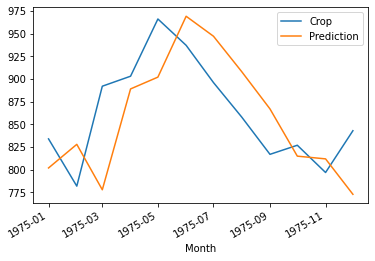

In [36]:
test_set.plot()